<a href="https://colab.research.google.com/github/MariaG0205/Analisis-Numerico/blob/main/Ejercicios_Capitulo_3_AnalisisNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Maria Alejandra Giraldo Duque. Cod 817021 
**Desarrollo ejercicios capitulo 3**

In [144]:
import numpy as np
import sympy as sp
from scipy import optimize
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

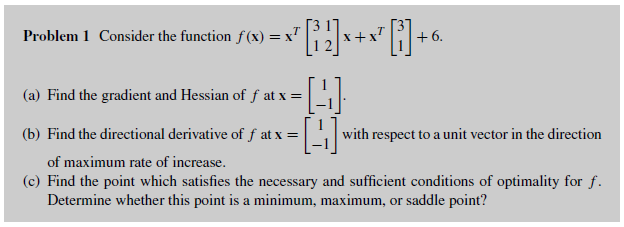

In [2]:
x1,x2 = sp.symbols("x1 x2") #Crear variables simbólicas
x = sp.Matrix([[x1],[x2]]) #Agruparlas en una matriz
a=sp.Matrix([[3,1],[1,2]])
b=sp.Matrix([3,1])
f=x.T*a*x +x.T*b + sp.Matrix([6])

print('La función a optimizar es  \n', f)

La función a optimizar es  
 Matrix([[x1*(3*x1 + x2) + 3*x1 + x2*(x1 + 2*x2) + x2 + 6]])


In [ ]:
f2=x1*(3*x1 + x2) + 3*x1 + x2*(x1 + 2*x2) + x2 + 6
gradf = [f2.diff(x) for x in (x1, x2)] #Gradiente de f(x)
print('El gradiente de la función es: \n',gradf)

El gradiente de la función es: 
 [6*x1 + 2*x2 + 3, 2*x1 + 4*x2 + 1]


In [ ]:
hessf = [[f1.diff(x1_,x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)] #Matriz hessiana de f(x)
hessf

[[6, 2], [2, 4]]

Solución apartado A

In [ ]:
gra1=sp.lambdify([x1,x2],gradf)
hes1=sp.lambdify([x1,x2],hessf)

grady=gra1(1,-1)
print('El gradiente en el punto (1,-1) es : \n',grady)
hessy=hes1(1,-1)

print('El hessiano en el punto (1,-1) es : \n',hessy)

El gradiente en el punto (1,-1) es : 
 [7, -1]
El hessiano en el punto (1,-1) es : 
 [[6, 2], [2, 4]]


Solución apartado B

In [ ]:
vecnormal = gra1(1,-1)

vecnor=vecnormal/np.linalg.norm(vecnormal)
vecnor
print('El vector de maximo crecimiento, esto es el gradiente en (1,-1) es : \n', vecnormal, '\n')
print('El vector de maximo crecimiento normalizado  es : \n',vecnor , '\n')
print('La norma del vector es \n :',np.linalg.norm(vecnor))



El vector de maximo crecimiento, esto es el gradiente en (1,-1) es : 
 [7, -1] 

El vector de maximo crecimiento normalizado  es : 
 [ 0.98994949 -0.14142136] 

La norma del vector es 
 : 0.9999999999999999


In [ ]:
derivada = gradf @ vecnor
derivada
print('la derivada direccional de la dirección de la tasa máxima de aumento: \n',derivada, '\n')

derivada_val=sp.lambdify([x1,x2],derivada)
derivada_val2=grad_val(1,-1) @ (vecnor)
print('La derivada direccional en x es : \n',derivada_val2)

la derivada direccional de la dirección de la tasa máxima de aumento: 
 5.65685424949238*x1 + 1.41421356237309*x2 + 2.82842712474619 

La derivada direccional en x es : 
 7.071067811865475


Apartado C


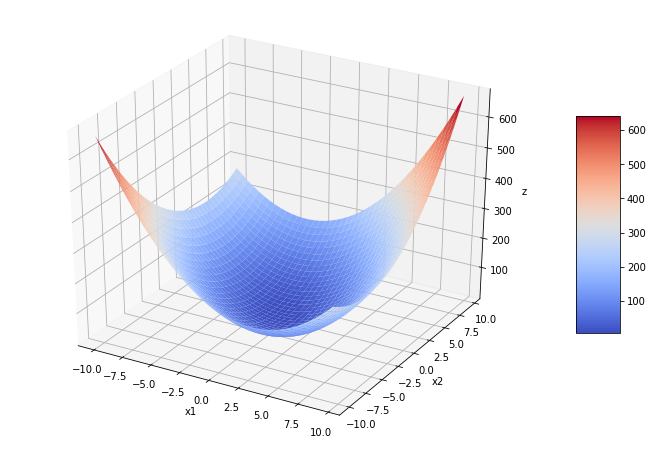

In [ ]:
f2=x1*(3*x1 + x2) + 3*x1 + x2*(x1 + 2*x2) + x2 + 6

XX = np.arange(-10, 10, 0.5)
YY= np.arange(-10, 10, 0.5)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],f2)

Z=F(X,Y)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

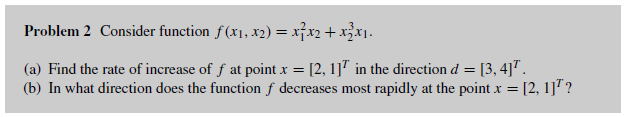

Solución apartado A

In [ ]:
x1,x2 = sp.symbols("x1 x2") #Crear variables simbólicas
fx=(x1**2*x2) + (x2**3*x1)

gradf = [fx.diff(x) for x in (x1, x2)] #Gradiente de f(x)
print('El gradiente de la función es: \n',gradf)

graeval=sp.lambdify([x1,x2],gradf)

grady=graeval(2,1)

vectord=np.array([[3],[4]])

d_normalice=vectord/np.linalg.norm(vectord)

El gradiente de la función es: 
 [2*x1*x2 + x2**3, x1**2 + 3*x1*x2**2]


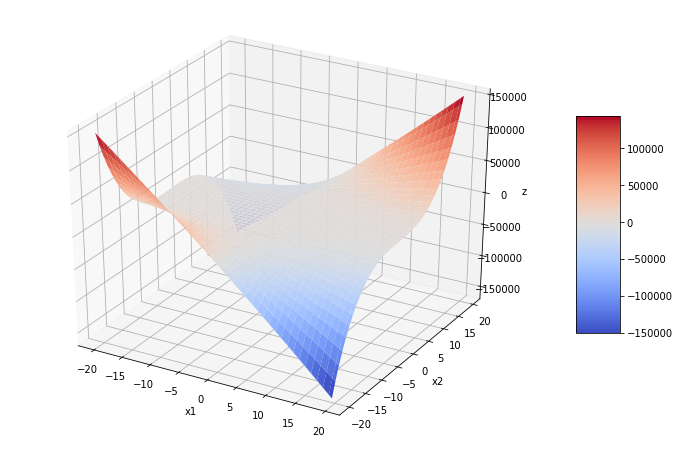

In [ ]:
XX = np.arange(-20, 20, 0.5)
YY= np.arange(-20, 20, 0.5)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()


In [ ]:
hessf = sp.derive_by_array(fx, [x1, x2])
hes1 = sp.lambdify((x1, x2), hessf, modules='numpy')
punto = np.array(hes1(2, 1))
dir1 = punto.T@vectord

print ('La tasa de aumento es: \n',dir1)

La tasa de aumento es: 
 [55]


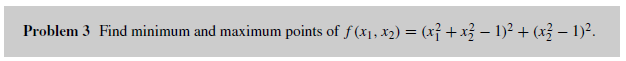

In [45]:
def gd1(x, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  #Entradas:
    #x: x0 valor inicial. 
    #a: tamaño de paso fijo
    #max_iter: número máximo de iteraciones permitidas.
    #epsi: tolerancia del método
  #Salidas:
    #xs: vector con los xk hallados
    #i+1: número de iteraciones realizadas
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x
  for i in range(max_iter): #iterar hasta maximo número de iteraciones
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x
      error = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if error < epsi:
        break
  return xs,i+1

Minimo local

In [118]:
def f(x1,x2): #Función objetivo
    return (x1**2+x2**2-1)**2 + (x2**2-1)**2

def grad(x1,x2): #Gradiente de f
    return np.array([4*x1*(x1**2 + x2**2 - 1), 4*x2*(x2**2 - 1) + 4*x2*(x1**2 + x2**2 - 1)])
 
x = np.array([-1,1])
max_iter = 100
epsi = 0.001;
a = 0.1

xs1,i1 = gd1(x, a, max_iter,epsi)

El punto minimo de la función mas cercano a [-1,1], es: 
  -0.3610567013253366 0.9656562895950733


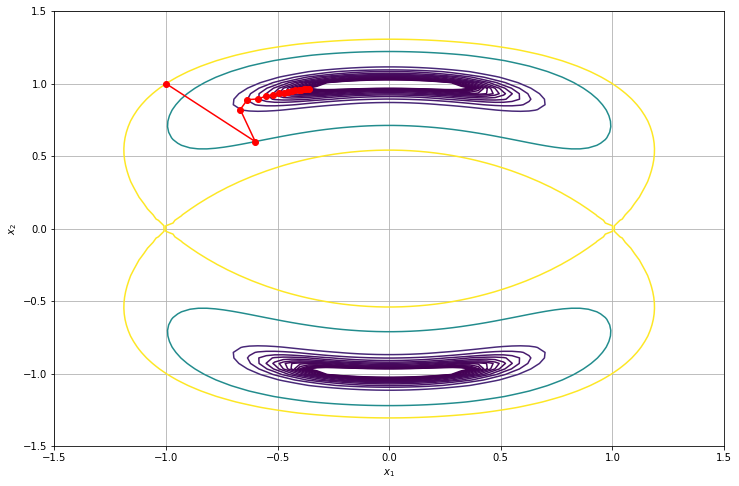

In [119]:
xx = np.linspace(-1.5, 1.5, 80)
yy = np.linspace(-1.5, 1.5, 80)
X, Y = np.meshgrid(xx, yy)
Z = (X**2+Y**2-1)**2 + (Y**2-1)**2

function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
#print (function_value)

plt.figure(figsize=(12,8))
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.grid()
plt.ylabel('$x_2$')
print('El punto minimo de la función mas cercano a [-1,1], es: \n ',xs1[i1,0],xs1[i1,1])

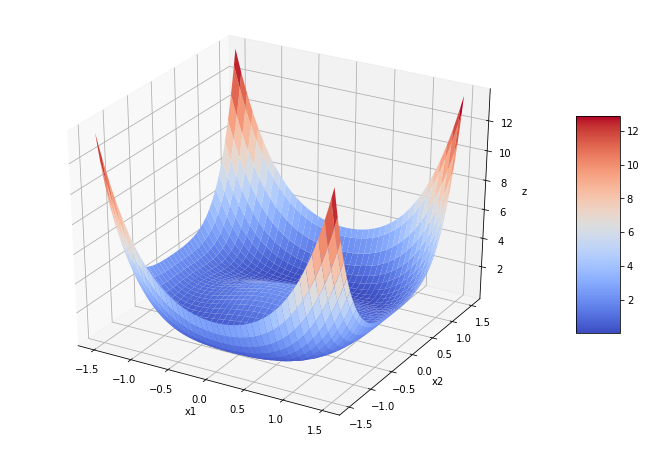

In [120]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

Text(0, 0.5, 'f(x)')

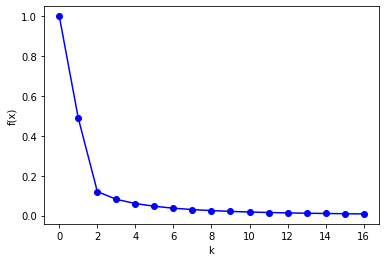

In [75]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

Máximo local

In [83]:
def f(x1,x2): #Función objetivo
    return -((x1**2+x2**2-1)**2 + (x2**2-1)**2)
 

In [84]:
def grad(x1,x2): #Gradiente de f
    return np.array([-4*x1*(x1**2 + x2**2 - 1), -4*x2*(x2**2 - 1) - 4*x2*(x1**2 + x2**2 - 1)])

In [85]:
x = np.array([-0.5,0.5])
max_iter = 100
epsi = 0.001;
a = 0.1

xs1,i1 = gd1(x, a, max_iter,epsi)

El maximo local es: 
 -0.02333109896766531 3.24771818405054e-05


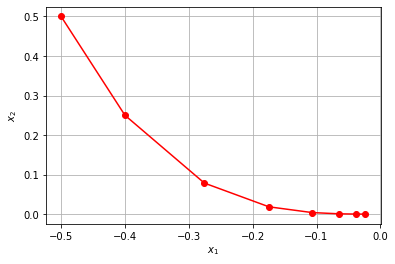

In [87]:
xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)
Z = (X**2+Y**2-1)**2 + (Y**2-1)**2

function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
#print (function_value)
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.grid()
plt.ylabel('$x_2$')
print('El maximo local es: \n',xs1[i1,0],xs1[i1,1])

Text(0, 0.5, 'f(x)')

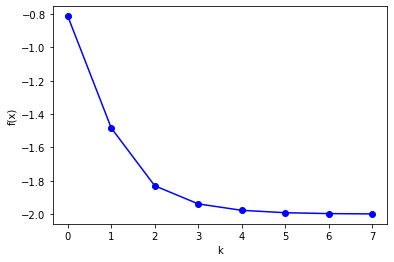

In [88]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

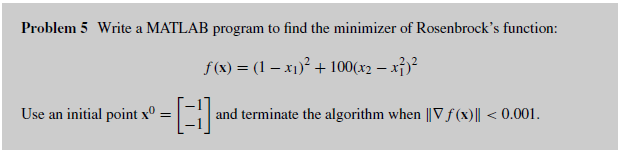

In [121]:
def f(x1,x2): #Función objetivo
    return (1-x1)**2 + 100*(x2-x1**2)**2

def grad(x1,x2): #Gradiente de f
    return np.array([-400*x1*(-x1**2 + x2) + 2*x1 - 2, -200*x1**2 + 200*x2])
 
x = np.array([-1,-1])
max_iter = 100
epsi = 0.001;
a = 0.001

xs1,i1 = gd1(x, a, max_iter,epsi)

El punto minimo de la función mas cercano a [-1,1], es: 
  0.12746062413922685 0.014243469933922587


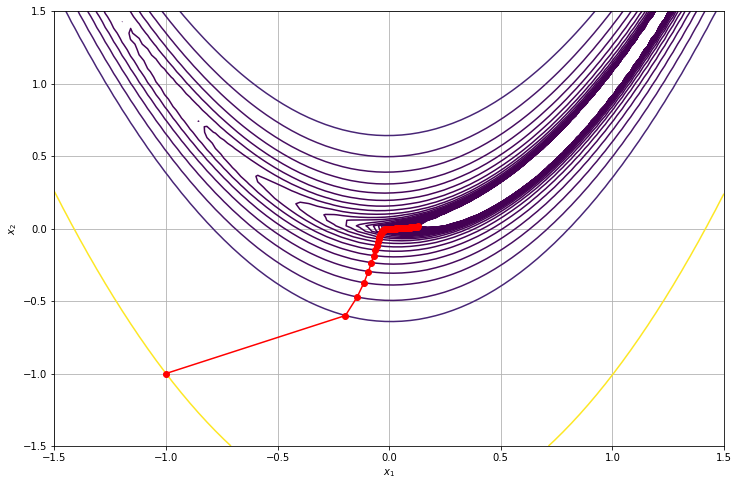

In [122]:
xx = np.linspace(-1.5, 1.5, 80)
yy = np.linspace(-1.5, 1.5, 80)
X, Y = np.meshgrid(xx, yy)
Z =(1-X)**2 + 100*(Y-X**2)**2

function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
#print (function_value)

plt.figure(figsize=(12,8))
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.grid()
plt.ylabel('$x_2$')
print('Minimización de la función, es: \n ',xs1[i1,0],xs1[i1,1])

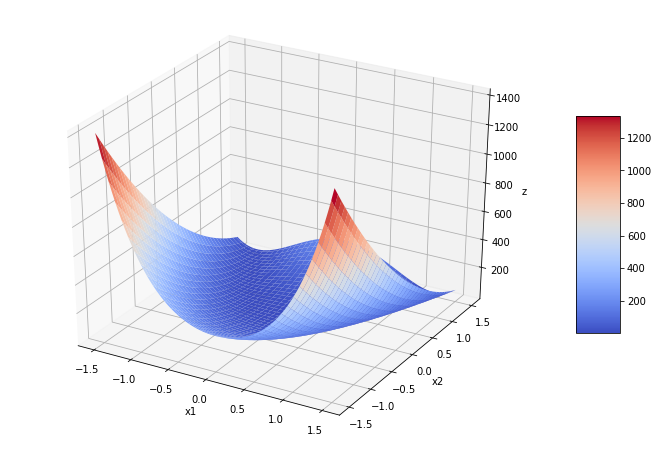

In [123]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()